#1. Introduction

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#Dataset


---
The dataset used in this analysis is the "Diabetes" dataset taken from UCI machine learning repository. It contains various health-related features and an outcome variable indicating whether a patient has diabetes or not. Here is a description of the dataset's columns:
1.	Pregnancies: The number of times a patient has been pregnant.
2.	Glucose: Plasma glucose concentration measured in milligrams per deciliter (mg/dL) after a 2-hour oral glucose tolerance test.
3.	BloodPressure: Diastolic blood pressure measured in mm Hg.
4.	SkinThickness: Triceps skin fold thickness measured in mm.
5.	Insulin: Serum insulin level measured in (mu U/ml).
6.	BMI (Body Mass Index): A calculated value derived from a patient's weight (in kg) divided by the square of their height (in meters).
7.	DiabetesPedigreeFunction: A diabetes pedigree function that quantifies a patient's genetic predisposition to diabetes.
8.	Age: The age of the patient in years.
9.	Class: The target variable indicating whether a patient has diabetes or not (test_positive for diabetes, test_negative for no diabetes).



#Import Libraries

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Problem Statement

This analysis is to develop a predictive model that can accurately classify whether a patient has diabetes or not based on the provided health-related features.

#Objective

The primary objective of this analysis is to:

•	Explore and understand the "Diabetes" dataset, including its characteristics, distributions, and relationships between variables.

•	Preprocess the data, including handling missing values, encoding categorical variables, and scaling features.

•	Split the data into training and testing sets.

•	Build and evaluate machine learning models for diabetes prediction, with a focus on decision trees.

•	Perform feature selection to identify the most important features for diabetes prediction.

#2. Data Loading

In [ ]:
# Load the dataset
path="/content/drive/MyDrive/Lab3_DecisionTrees/diabetes_csv.csv"
df = pd.read_csv(path)
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [ ]:
#Function to rename columns
def rename_columns(df):
    df = df.rename(columns={
        'preg': 'Pregnancies',
        'plas': 'PlasmaGlucose',
        'pres': 'BloodPressure',
        'skin': 'SkinThickness',
        'insu': 'Insulin',
        'mass': 'BMI',
        'pedi': 'PedigreeFunction',
        'age': 'Age',
        'class': 'Diabetic'
    })
    return df
# Call the function to rename columns
df = rename_columns(df)
df.columns

Index(['Pregnancies', 'PlasmaGlucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'PedigreeFunction', 'Age', 'Diabetic'],
      dtype='object')

In [ ]:
# Define a mapping from categories to binary values
category_to_binary = {'tested_positive': 1, 'tested_negative': 0}

#Convert the 'Diabetic' column to binary
df['Diabetic'] = df['Diabetic'].replace(category_to_binary)
df.head()

,Pregnancies,PlasmaGlucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFunction,Age,Diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#3.Exploratory Data Analysis (EDA)

In [ ]:
#Data Overview:
#Shape of the dataset
def display_shape(df):
    print("Shape of the DataFrame:", df.shape)
display_shape(df)

Shape of the DataFrame: (768, 9)


In [ ]:
#Data types of columns
def display_info(df):
    print(df.info())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    int64  
 1   PlasmaGlucose     768 non-null    int64  
 2   BloodPressure     768 non-null    int64  
 3   SkinThickness     768 non-null    int64  
 4   Insulin           768 non-null    int64  
 5   BMI               768 non-null    float64
 6   PedigreeFunction  768 non-null    float64
 7   Age               768 non-null    int64  
 8   Diabetic          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Descriptive statistics
def describe(df):
    print(df.describe())
describe(df)

       Pregnancies  PlasmaGlucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000     768.000000     768.000000     768.000000  768.000000   
mean      3.845052     120.894531      69.105469      20.536458   79.799479   
std       3.369578      31.972618      19.355807      15.952218  115.244002   
min       0.000000       0.000000       0.000000       0.000000    0.000000   
25%       1.000000      99.000000      62.000000       0.000000    0.000000   
50%       3.000000     117.000000      72.000000      23.000000   30.500000   
75%       6.000000     140.250000      80.000000      32.000000  127.250000   
max      17.000000     199.000000     122.000000      99.000000  846.000000   

              BMI  PedigreeFunction         Age    Diabetic  
count  768.000000        768.000000  768.000000  768.000000  
mean    31.992578          0.471876   33.240885    0.348958  
std      7.884160          0.331329   11.760232    0.476951  
min      0.000000          0.078000   21

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
PlasmaGlucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
PedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Diabetic,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


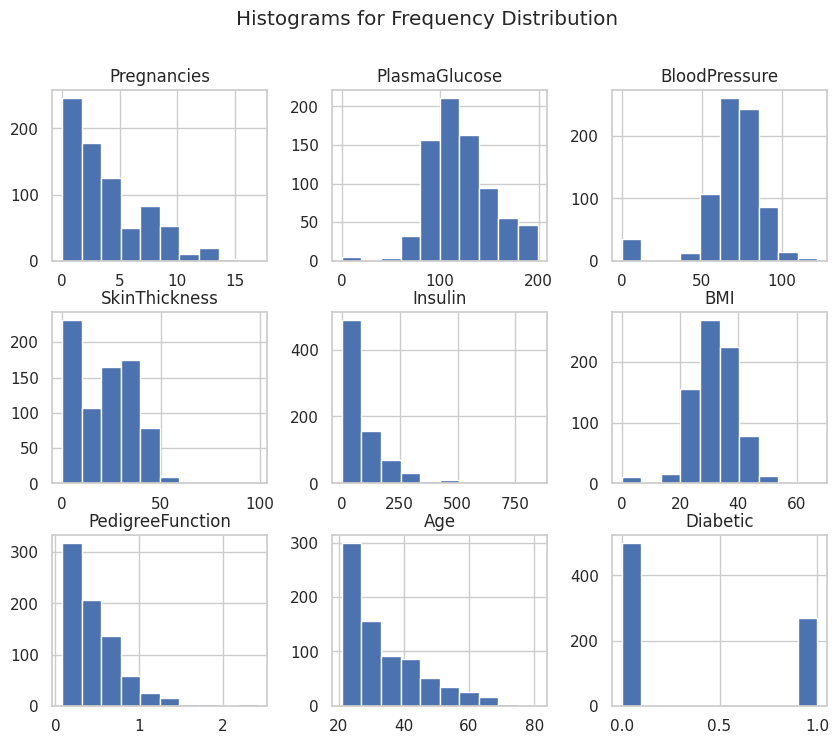

In [ ]:
#Univariate Analysis
def univariate_histograms(df):
    df.hist(figsize=(10, 8))
    plt.suptitle("Histograms for Frequency Distribution")
    plt.show()
univariate_histograms(df)

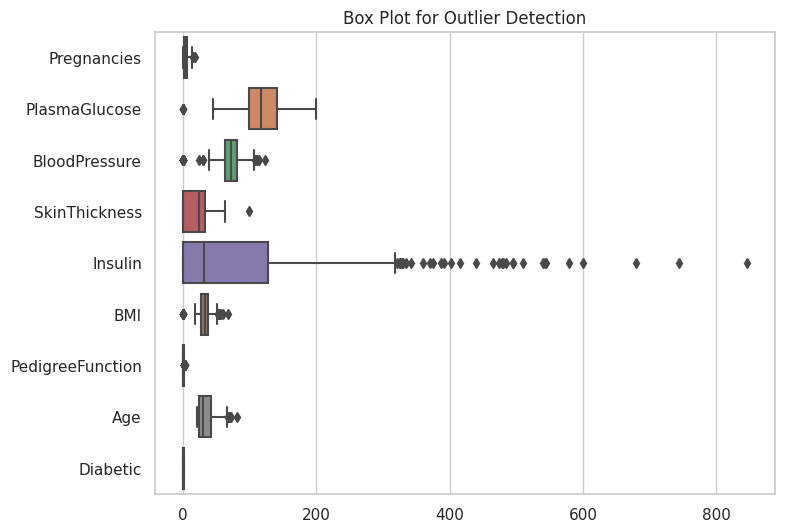

In [ ]:
#Box plots for outlier detection
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, orient="h")
plt.title("Box Plot for Outlier Detection")
plt.show()

The graph above shows the distribution of each variable.It is evident that the Insulin variable as an example plot is skewed to the right.This also shows why we have outliers in our data as we can see on the boxplot that there are outliers on the rest of the variables.The distrubution are not normally distributed and the mean is higher than the median on most variables,from this we can already conclude that we cannot use mean for missing values due to outliers and we would need to use medianto replace missing values.

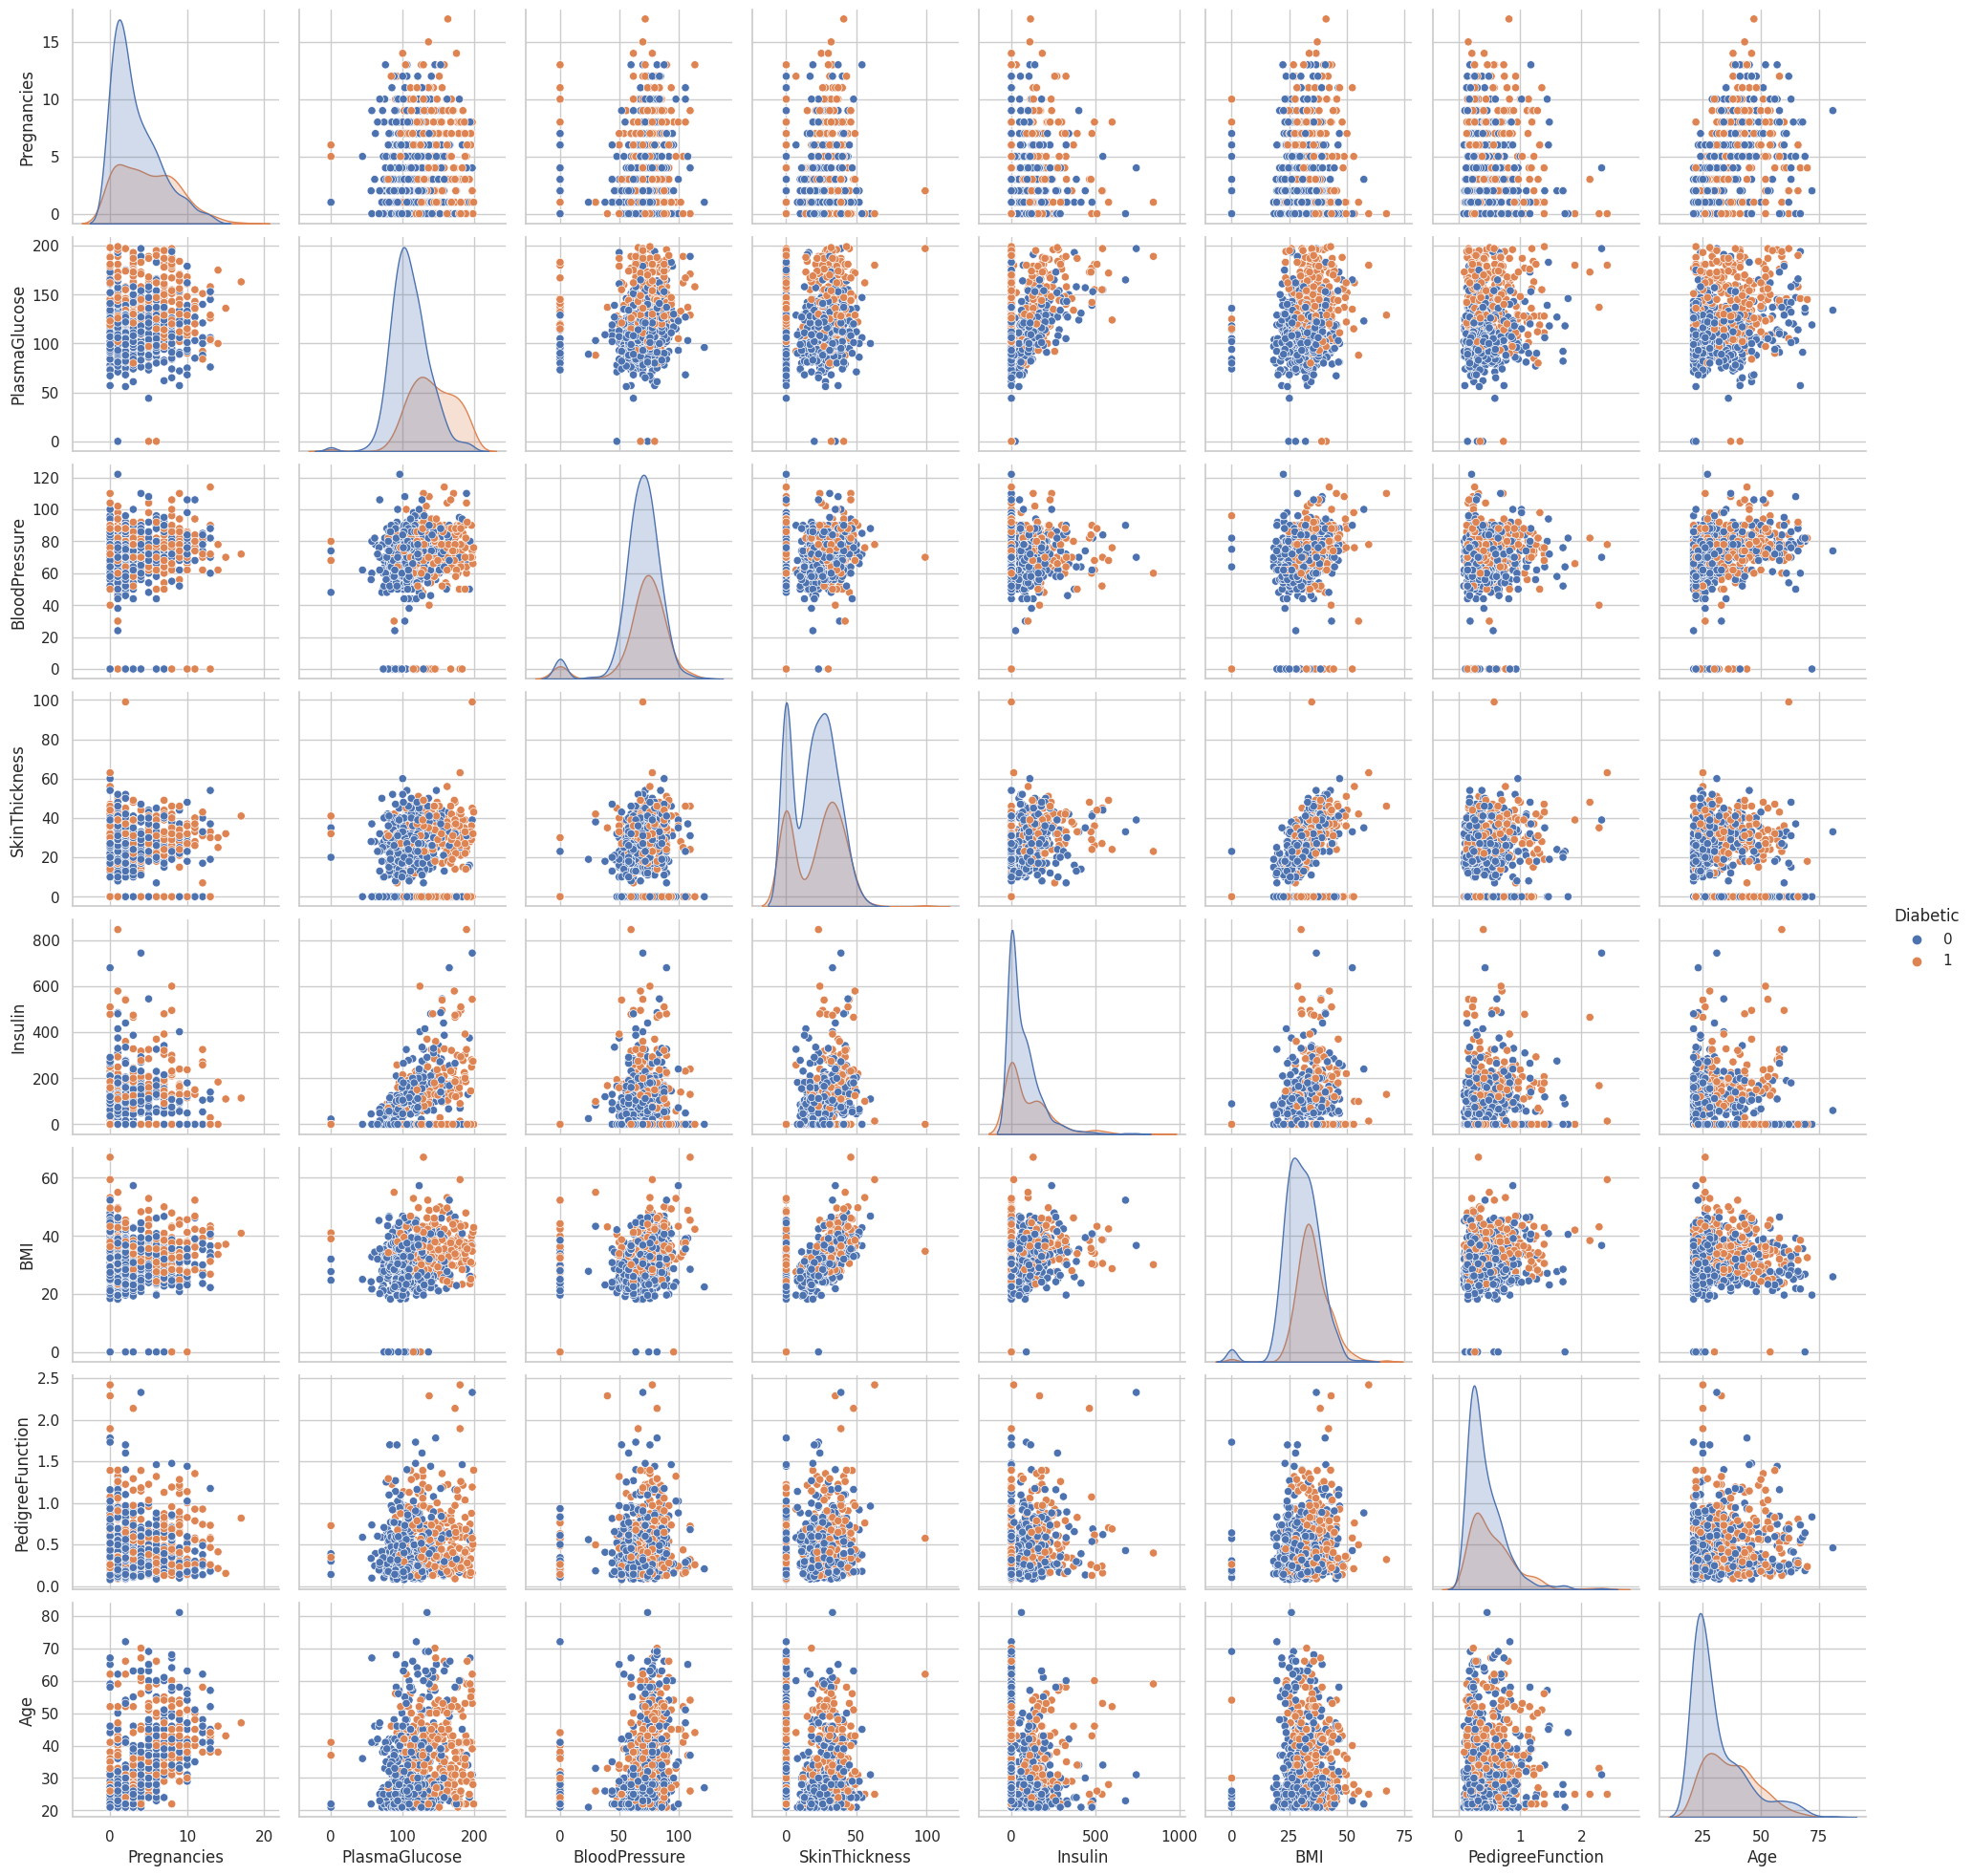

<Figure size 400x200 with 0 Axes>

In [ ]:
#Scatter plots for continuous vs continuous variables.
sns.pairplot(df, diag_kind='kde', hue='Diabetic')
plt.figure(figsize=(4, 2))
plt.suptitle("Pairplot of Continuous Variables by Outcome")
plt.show()

The pair plot allowed us to examine relationships between continuous variables. It revealed potential correlations between certain attributes, such as BMI and skin thickness. They were used to compare the spreads, and presence of outliers in the continuous variables (Glucose Concentration, BMI, Age) for Diabetic and Non-Diabetic individuals. They provide insights into how these variables differ between the two groups, which can be valuable for understanding the characteristics associated with diabetes in this dataset

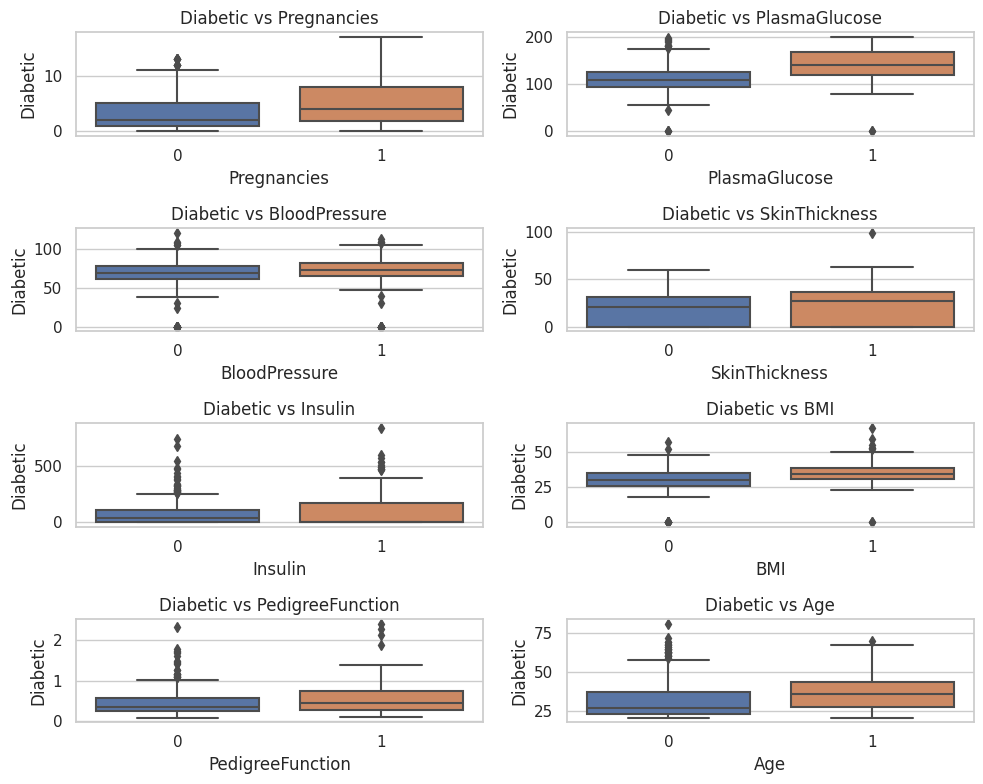

In [ ]:
plt.figure(figsize=(10, 8))
num_features = len(df.columns) - 1
cols_per_row = 2

for idx, feature in enumerate(df.columns.drop('Diabetic')):
    plt.subplot((num_features + 1) // cols_per_row, cols_per_row, idx + 1)
    sns.boxplot(x='Diabetic', y=feature, data=df)
    plt.title(f'Diabetic vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Diabetic')
plt.tight_layout()
plt.show()

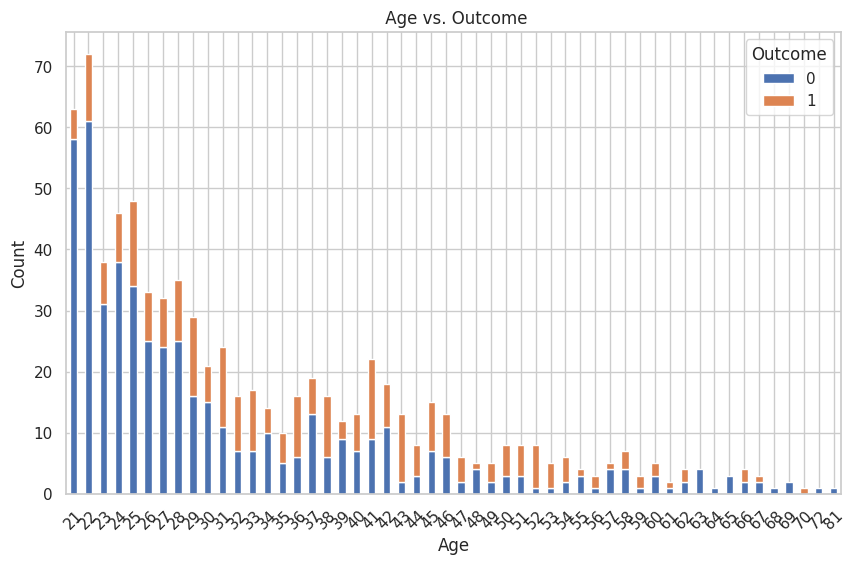

In [ ]:
# categorical feature
feature_to_analyze = 'Age'

# Create a contingency table
contingency_table = pd.crosstab(df[feature_to_analyze], df['Diabetic'])

# Plot the stacked bar plot
ax = contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
# Set labels and title
plt.title(f" {feature_to_analyze} vs. Outcome")
plt.xlabel(feature_to_analyze)
plt.ylabel("Count")
plt.legend(title="Outcome", loc="upper right")
plt.xticks(rotation=45)
plt.show()


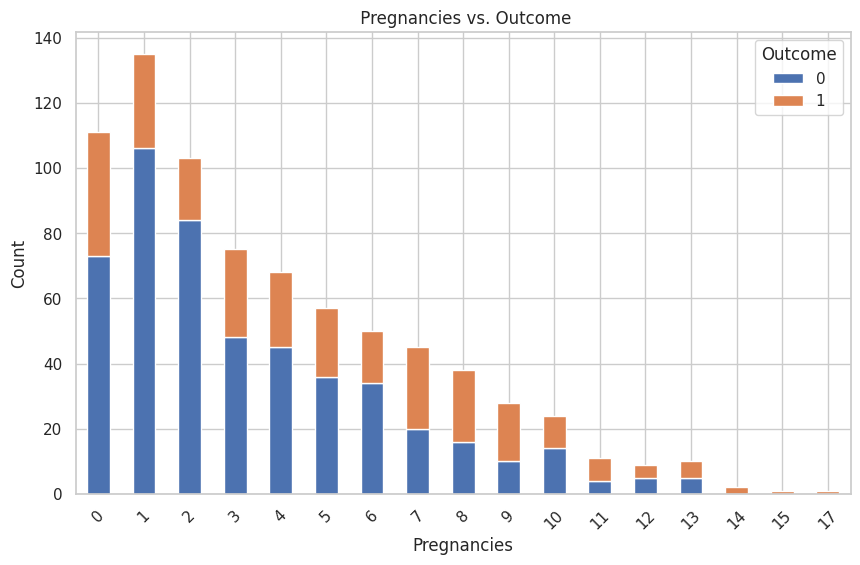

In [ ]:
# categorical feature
feature_to_analyze = 'Pregnancies'

# Create a contingency table
contingency_table = pd.crosstab(df[feature_to_analyze], df['Diabetic'])

# Plot the stacked bar plot
ax = contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
# Set labels and title
plt.title(f" {feature_to_analyze} vs. Outcome")
plt.xlabel(feature_to_analyze)
plt.ylabel("Count")
plt.legend(title="Outcome", loc="upper right")
plt.xticks(rotation=45)
plt.show()

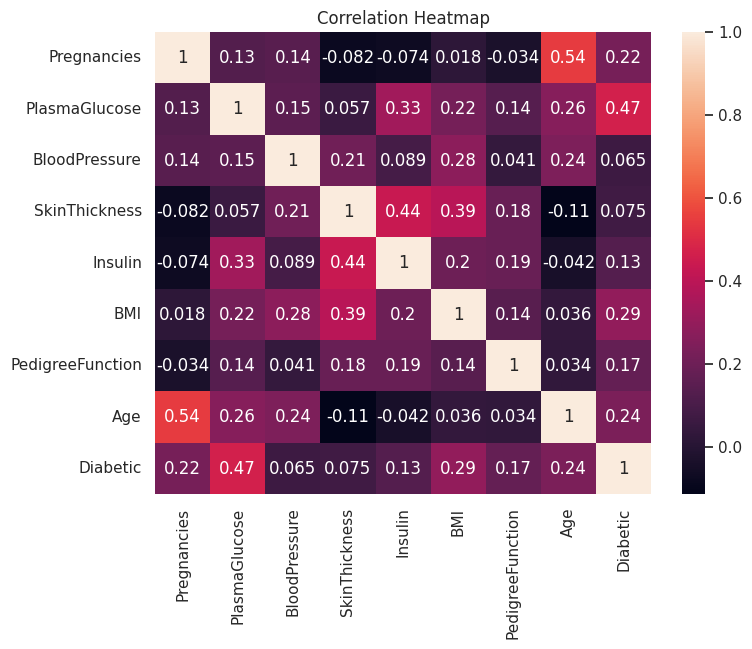

In [ ]:
# Correlation Analysis
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

The confusion matrix shows that all the features are positively correlated with the target variable, which represents diabetes. This means that as the values of the features increase, the likelihood of having diabetes also increases. This positive correlation is a promising sign for building a model to predict diabetes cases, as it suggests that the features can be used to identify people at risk of the disease.

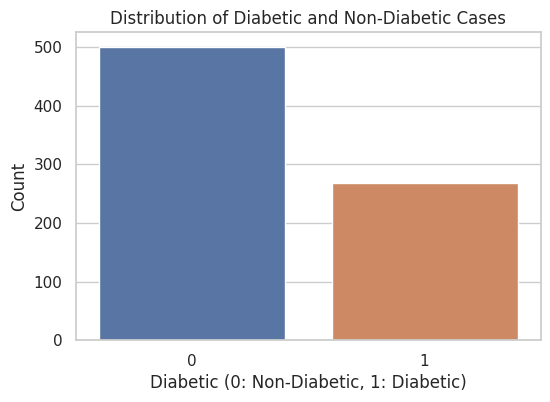

In [ ]:
# Create a count plot to visualize the distribution of Diabetic and Non-Diabetic cases
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetic', data=df)
plt.title('Distribution of Diabetic and Non-Diabetic Cases')
plt.xlabel('Diabetic (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Count')
plt.show()

#4.Data Pre-processing

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Pregnancies         0
PlasmaGlucose       0
BloodPressure       0
SkinThickness       0
Insulin             0
BMI                 0
PedigreeFunction    0
Age                 0
Diabetic            0
dtype: int64

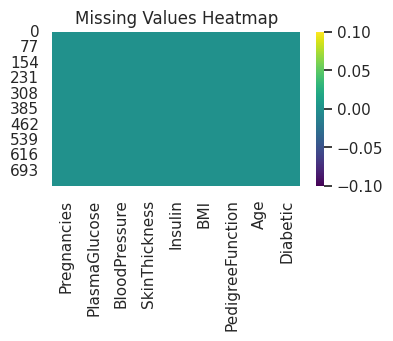

In [ ]:
# Visualize missing values
plt.figure(figsize=(4, 2))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

#Feature Engineering

In [ ]:
#Grouping BMI
def BMI_Cat(BMI):
    if BMI < 18.5:
        return 'Underweight'
    elif 18.5 <= BMI < 24.9:
        return 'Normal Weight'
    elif 24.9 <= BMI < 29.9:
        return 'Overweight'
    else:
        return 'Obese'
df['BMI_Cat'] = df['BMI'].apply(BMI_Cat)

In [ ]:
#Grouping Insulin levels
def Insulin_Cat(Insulin):
    if Insulin < 50:
        return 'Low'
    elif Insulin < 150:
        return 'Normal'
    else:
        return 'High'
df['Insulin_Cat'] = df['Insulin'].apply(Insulin_Cat)

In [ ]:
def BP_Category(BloodPressure):
    if BloodPressure < 90:
        return 'Low'
    elif BloodPressure < 120:
        return 'Normal'
    elif BloodPressure < 140:
        return 'Prehypertension'
    else:
        return 'Hypertension'
df['BP_Category'] = df['BloodPressure'].apply(BP_Category)

In [ ]:
def Age_Cat(Age):
    if Age < 35:
        return 'Young Adults'
    elif 35 <= Age < 60:
        return 'Middle-Aged Adults'
    else:
        return 'Seniors'
df['Age_Cat'] = df['Age'].apply(Age_Cat)

In [ ]:
def Glucose_Cat(PlasmaGlucose):
    if PlasmaGlucose < 140:
        return 'Normal'
    else:
        return 'High'
df['Glucose_Cat'] = df['PlasmaGlucose'].apply(Glucose_Cat)

In [ ]:
df.head()

,Pregnancies,PlasmaGlucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFunction,Age,Diabetic,BMI_Cat,Insulin_Cat,BP_Category,Age_Cat,Glucose_Cat
0,6,148,72,35,0,33.6,0.627,50,1,Obese,Low,Low,Middle-Aged Adults,High
1,1,85,66,29,0,26.6,0.351,31,0,Overweight,Low,Low,Young Adults,Normal
2,8,183,64,0,0,23.3,0.672,32,1,Normal Weight,Low,Low,Young Adults,High
3,1,89,66,23,94,28.1,0.167,21,0,Overweight,Normal,Low,Young Adults,Normal
4,0,137,40,35,168,43.1,2.288,33,1,Obese,High,Low,Young Adults,Normal


In [ ]:
df_encoded = pd.get_dummies(df, columns=['BMI_Cat','Insulin_Cat','BP_Category', 'Glucose_Cat','Age_Cat'], drop_first=True)
df_encoded

,Pregnancies,PlasmaGlucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFunction,Age,Diabetic,BMI_Cat_Obese,BMI_Cat_Overweight,BMI_Cat_Underweight,Insulin_Cat_Low,Insulin_Cat_Normal,BP_Category_Normal,BP_Category_Prehypertension,Glucose_Cat_Normal,Age_Cat_Seniors,Age_Cat_Young Adults
0,6,148,72,35,0,33.6,0.627,50,1,1,0,0,1,0,0,0,0,0,0
1,1,85,66,29,0,26.6,0.351,31,0,0,1,0,1,0,0,0,1,0,1
2,8,183,64,0,0,23.3,0.672,32,1,0,0,0,1,0,0,0,0,0,1
3,1,89,66,23,94,28.1,0.167,21,0,0,1,0,0,1,0,0,1,0,1
4,0,137,40,35,168,43.1,2.288,33,1,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1,0,0,0,0,0,0,1,1,0
764,2,122,70,27,0,36.8,0.340,27,0,1,0,0,1,0,0,0,1,0,1
765,5,121,72,23,112,26.2,0.245,30,0,0,1,0,0,1,0,0,1,0,1
766,1,126,60,0,0,30.1,0.349,47,1,1,0,0,1,0,0,0,1,0,0


In [ ]:
X = df_encoded.drop(columns=['Diabetic'])
y = df_encoded['Diabetic']

#Feature  Selection

We use SelectKBest with a chi-squared scoring function to pick the top 5 features the reasons is to reduce dataset complexity, enhance model performance by prioritizing essential attributes, create a more understandable model, prevent overfitting, and optimize computational resources. The specific choice of 5 features is based on the contextual factors and adapted based on accurately classifying whether a patient has diabetes or not based on the provided health-related features.

In [ ]:
#Feature Selection
from sklearn.feature_selection import SelectKBest, chi2
select_k_best = SelectKBest(score_func=chi2, k=5)
X_new = select_k_best.fit_transform(X, y)

NameError: ignored

In [ ]:
# Get the selected feature indices
selected_indices = select_k_best.get_support(indices=True)

# Get the scores of the selected features
feature_scores = select_k_best.scores_

# Get the feature names from the original DataFrame
selected_feature_names = X.columns[selected_indices]

# Create a DataFrame to display the selected features and their scores
selected_features_df = pd.DataFrame({'Feature': selected_feature_names, 'Score': feature_scores[selected_indices]})

# Print the selected features and their scores
print("Selected Features:")
print(selected_features_df)

Selected Features:
         Feature        Score
0    Pregnancies   111.519691
1  PlasmaGlucose  1411.887041
2        Insulin  2175.565273
3            BMI   127.669343
4            Age   181.303689


#Standard Scaling for continuous features

In [ ]:
#Standard scaling for continuous features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded.drop('Diabetic', axis=1))
df_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ..., -1.70249146,
        -0.20851441, -1.32017315],
       [-0.84488505, -1.12339636, -0.16054575, ...,  0.58737446,
        -0.20851441,  0.7574764 ],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.70249146,
        -0.20851441,  0.7574764 ],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ...,  0.58737446,
        -0.20851441,  0.7574764 ],
       [-0.84488505,  0.1597866 , -0.47073225, ...,  0.58737446,
        -0.20851441, -1.32017315],
       [-0.84488505, -0.8730192 ,  0.04624525, ...,  0.58737446,
        -0.20851441,  0.7574764 ]])

#Modelling

#Data Splitting train set and test set



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Decision Tree classifer object
model = DecisionTreeClassifier(max_depth=3)

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

We used decision trees to classify diabetes outcomes. We trained the model on the training dataset and tested it on the testing dataset. We used accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrices to measure the model's effectiveness.

#Model Evaluation

Accuracy: 0.7597402597402597

Confusion Matrix:
 [[83 16]
 [21 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

ROC AUC Score: 0.7282828282828282


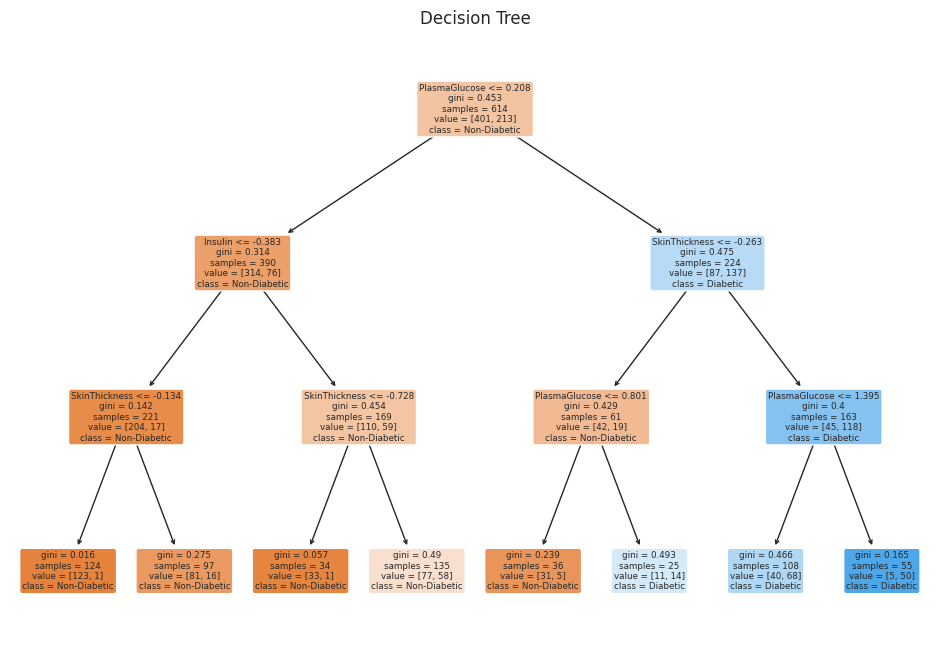

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

from sklearn.metrics import roc_auc_score
#Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Print model performance metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'], filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()

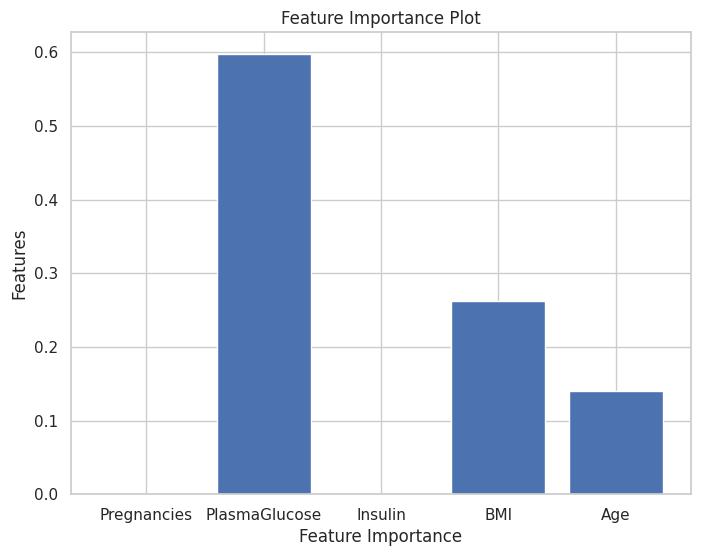

In [ ]:
# Calculate and print feature importance
feature_importance = model.feature_importances_
feature_names = X.columns[select_k_best.get_support(indices=True)]

# Create a bar plot for feature importances
plt.figure(figsize=(8, 6))
plt.bar(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

Feature importance is a measure of how important each feature is in predicting the outcome of a model. In this case, we are interested in predicting whether someone has diabetes or not. The original feature set includes all the features in the diabetes dataset. The selected feature set includes only the features that were found to be most important in predicting diabetes. The results of the feature importance analysis showed that glucose and BMI are the most important features for predicting diabetes, regardless of whether the original or selected feature set is used. This means that these two features are the most likely to tell us whether someone has diabetes or not.



**Conclusion**

In this analysis of the diabetes dataset, we conducted a comprehensive exploration of data characteristics, preprocessing, feature selection, and modelling to predict diabetes risk. We found that key features, such as "Glucose" and "BMI," consistently played crucial roles in predicting diabetes, underscoring their clinical relevance. The decision tree model achieved an accuracy of approximately 76%, demonstrating the model's ability to distinguish between diabetic and non-diabetic cases. However, further optimization is needed to address the imbalance in precision and recall scores for diabetic predictions.



**Recommendations**

**Hyperparameter Tuning:** We recommend further fine-tuning the decision tree model by adjusting hyperparameters such as "max_depth" and "min_samples_split" to improve the balance between precision and recall for diabetic predictions.

**Collect more data:** Expanding the dataset with more diverse samples could enhance model performance and generalization, particularly for diabetic cases.

**Consider alternative models:** Exploring alternative machine learning algorithms, such as Random Forests or Gradient Boosting, may provide improved predictive accuracy.


The analysis presented in the provided Jupyter notebook offers valuable insights into the process of exploring, preprocessing, and modelling data for the prediction of diabetes outcomes. The experience of working on this data analysis and decision tree modelling project has been incredibly valuable in my journey of learning new skills and expanding my knowledge in data science, more specifically in health analytics. Here are some key takeaways and how this project has contributed to my learning journey:

I have learned the importance of thoroughly understanding the dataset before getting into any analysis. This includes examining data characteristics, distributions, and relationships between variables. It's crucial to have a solid grasp of the data you're working with. Data preprocessing is a critical step in any data analysis. This project taught me the significance of handling missing data and the impact of feature engineering on model performance. Creating new features and encoding categorical data can provide valuable insights. The concept of feature selection was a new learning point for me. I now understand that not all features are equally important, and it's essential to identify the most relevant ones for the task at hand. This process can significantly impact model efficiency and interpretability.

The project further taught me how to implement decision tree modelling for classification. It provided valuable insights into training and evaluating machine learning models, including the consideration of various performance metrics such as accuracy, precision, recall, and ROC AUC on a different dataset. This was particularly enlightening, as the visualisation of the decision tree demonstrated how the model makes decisions based on the selected features, offering insights into the model's decision-making process.

I learned that model performance can often be fine-tuned by adjusting hyperparameters, which I will haven’t yet tried but will keep include in one of future analysis. In this case, optimizing the decision tree model is recommended to achieve a better balance between precision and recall. The project has made me realize the practical application of data science in healthcare and clinical settings. Predicting diabetes is a real-world problem, and the skills I've learned are directly applicable to solving such issues. Learning is an ongoing process, and this project reinforced the importance of staying curious and continuously expanding my skill set. It has inspired me to explore alternative machine learning algorithms and techniques. This project has been a pushed me to try new techniques such as using SelectKBest to select features, and it has played a significant role in my learning journey in data science. It has taught me not only technical skills but also the importance of approaching data with curiosity, attention to detail, and a commitment to delivering actionable insights. I look forward to applying these skills to new challenges and further advancing my knowledge in the field of data science.

